In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Import train_test_split
from sklearn import metrics

In [2]:
col_names=['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']
#load dataset
pima = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Datasets/diabetes.csv', header=None, names=col_names)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
pima=pima.drop(0)
pima

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Split Dataset in Features and Target variable
feature_cols=['Pregnant', 'Insulin', 'BMI', 'Age', 'Glucose', 'BP', 'Pedigree']
x=pima[feature_cols]#Features
y=pima.Label#Target Variable

In [5]:
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.shape

(768, 9)

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pregnant  768 non-null    object
 1   Glucose   768 non-null    object
 2   BP        768 non-null    object
 3   Skin      768 non-null    object
 4   Insulin   768 non-null    object
 5   BMI       768 non-null    object
 6   Pedigree  768 non-null    object
 7   Age       768 non-null    object
 8   Label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [8]:
#Split Dataset into Training set and Test Set
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
#70% Training and 30% Test

In [9]:
#Create Decision Tree Classifier Object
clf=DecisionTreeClassifier()

#Train Decision Tree Classifier
clf=clf.fit(x_train, y_train)

#Predict the Response for Test Dataset
y_pred=clf.predict(x_test)

In [10]:
#Model Accuracy, how often is the Classifier Correct?
print("Accuracy: %.2f"%(metrics.accuracy_score(y_test, y_pred)*100)+'%')

Accuracy: 70.56%


In [11]:
!pip install graphviz
!pip install pydotplus

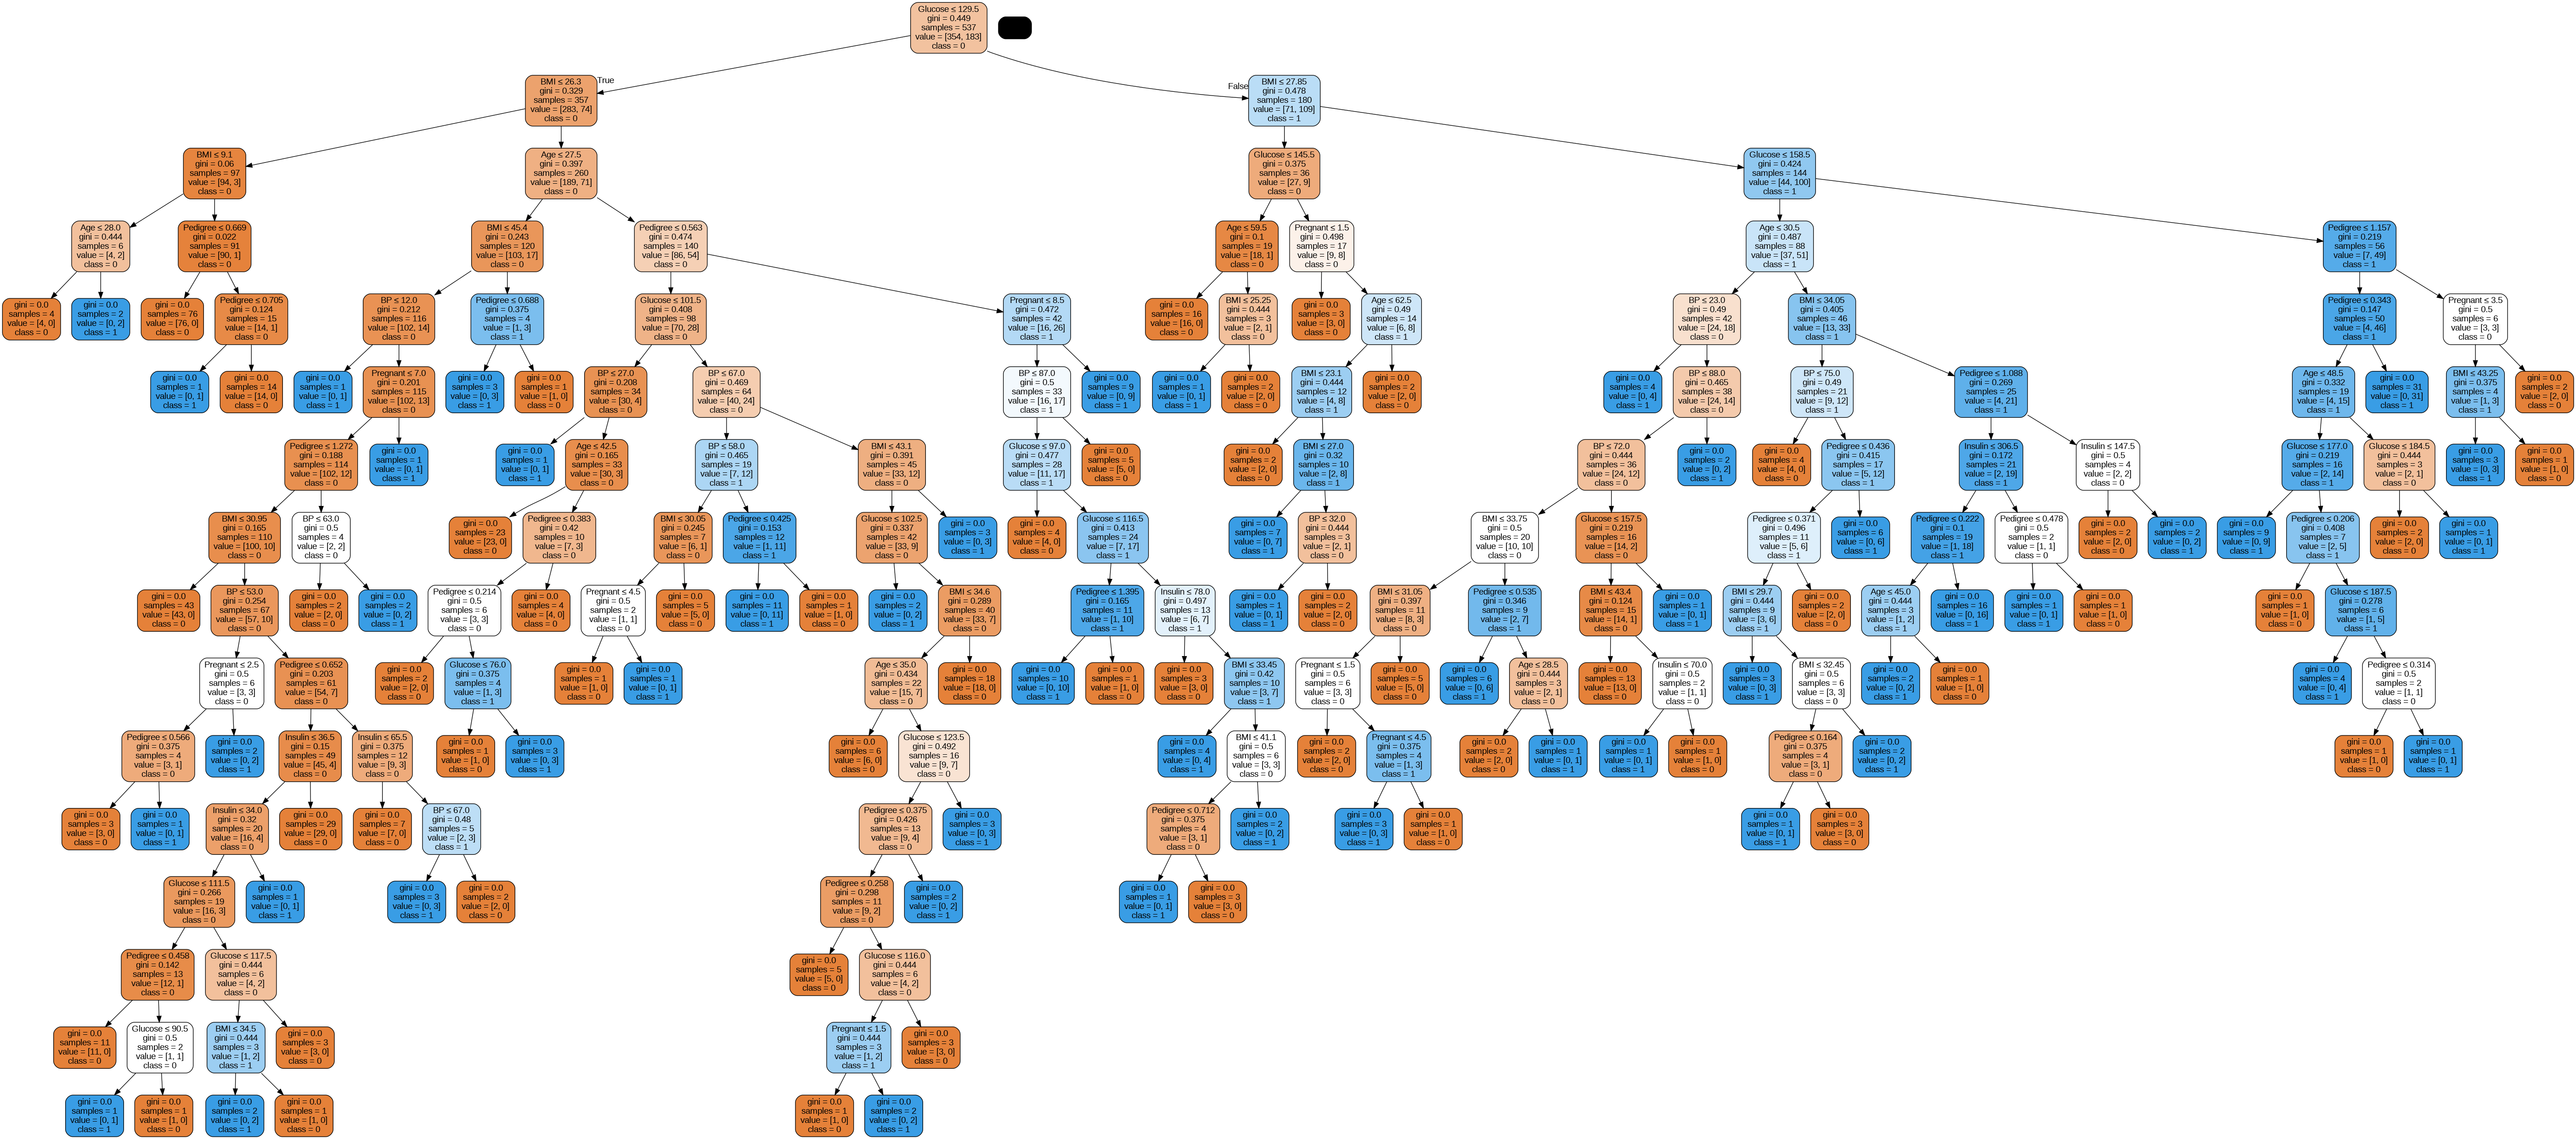

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols,
      class_names=['0', '1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())